In [50]:
%matplotlib inline
import random
import tensorflow as tf
from d2l import tensorflow as d2l

### Generate the Data Set

In [51]:
def synthetic_data(w, b, num_examples):  #@save
    """Generate y = Xw + b + noise."""
    X = tf.zeros((num_examples, w.shape[0]))
    X += tf.random.normal(shape=X.shape)
    y = tf.matmul(X, tf.reshape(w, (-1, 1))) + b
    y += tf.random.normal(shape=y.shape, stddev=0.01)
    y = tf.reshape(y, (-1, 1))
    return X, y

true_w = tf.constant([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [52]:
print('features:', features[0],'\nlabel:', labels[0])

features: tf.Tensor([-2.1121213  0.3569556], shape=(2,), dtype=float32) 
label: tf.Tensor([-1.2262679], shape=(1,), dtype=float32)


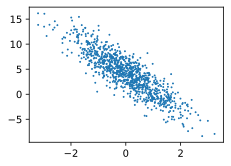

In [53]:
d2l.set_figsize()
# The semicolon is for displaying the plot only
d2l.plt.scatter(features[:, (1)].numpy(), labels.numpy(), 1);

### Reading the Dataset

In [54]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = tf.constant(indices[i: min(i + batch_size, num_examples)])
        yield tf.gather(features, j), tf.gather(labels, j)

In [55]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tf.Tensor(
[[-0.27875572 -0.79712033]
 [ 0.25098407  0.17202443]
 [ 0.11881387 -0.26864576]
 [ 1.2421715   0.14654863]
 [-0.31453294  0.61599946]
 [ 0.21661545 -0.02630051]
 [-1.4507418  -0.6563174 ]
 [ 0.00875683  0.15981315]
 [ 0.3395118  -0.38794103]
 [ 1.2355975   1.0862883 ]], shape=(10, 2), dtype=float32) 
 tf.Tensor(
[[6.3403563]
 [4.1231966]
 [5.343064 ]
 [6.19815  ]
 [1.4897591]
 [4.7262683]
 [3.5278432]
 [3.6732886]
 [6.1798277]
 [2.9845567]], shape=(10, 1), dtype=float32)


###  Initializing Model Parameters

In [56]:
w = tf.Variable(tf.random.normal(shape=(2, 1), mean=0, stddev=0.01),
                trainable=True)
b = tf.Variable(tf.zeros(1), trainable=True)

### Defining the Model

In [57]:
def linreg(X, w, b):  #@save
    """The linear regression model."""
    return tf.matmul(X, w) + b

### Defining the Loss Function

In [58]:
def squared_loss(y_hat, y):  #@save
    """Squared loss."""
    return (y_hat - tf.reshape(y, y_hat.shape)) ** 2 / 2

### Define Optimization Algorithm

In [59]:
def sgd(params, grads, lr, batch_size):  #@save
    """Minibatch stochastic gradient descent."""
    for param, grad in zip(params, grads):
        param.assign_sub(lr*grad/batch_size)

In [60]:
### Training

In [61]:
lr = 0.03
num_epochs = 10
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        with tf.GradientTape() as g:
            l = loss(net(X, w, b), y)  # Minibatch loss in `X` and `y`
        # Compute gradient on l with respect to [`w`, `b`]
        dw, db = g.gradient(l, [w, b])
        # Update parameters using their gradient
        sgd([w, b], [dw, db], lr, batch_size)
    train_l = loss(net(features, w, b), labels)
    print(f'epoch {epoch + 1}, loss {float(tf.reduce_mean(train_l)):f}')

epoch 1, loss 0.036437
epoch 2, loss 0.000135
epoch 3, loss 0.000048
epoch 4, loss 0.000048
epoch 5, loss 0.000048
epoch 6, loss 0.000048
epoch 7, loss 0.000048
epoch 8, loss 0.000048
epoch 9, loss 0.000048
epoch 10, loss 0.000048


In [62]:
print(f'error in estimating w: {true_w - tf.reshape(w, true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: [9.930134e-05 1.411438e-04]
error in estimating b: [-0.00093746]
